In [ ]:
# Install packages
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install tensorflow

In [68]:
# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

In [77]:
# Scrap me: test.csv doesn't include the transported column! Should always be false
loadSeparateTestCsv = False # Set to False if we want to only train and test on the train csv

# We might want to mount a shared google drive so we don't have to reupload
# everytime the session expires

trainData = pd.read_csv("train.csv")
data = None
testData = None
if loadSeparateTestCsv:
  testData = pd.read_csv("test.csv")
  data = pd.concat([trainData, testData])
else:
  data = trainData

# FEATURE MODIFICATION SETTINGS
dropCols = ["PassengerId", "Name"] # Columns to drop entirely
binaryCols = ["CryoSleep", "VIP", "Transported"] # Binary columns to replace with 1's and 0's
categoricalCols = [] # Category columns that are commonly shared, dummies are built from these
# Ok my idea for this is that for the fairly unique columns we should generate a numerical
# id for each unique entry, then replace the column with the id. Generating dummies with these
# just leads to a feature explosion.
uniqueGeneratorCols = ["Cabin", "HomePlanet", "Destination"]
###############################

# Not sure why these features have NaN's, but we can (safely?) replace them with 0's.
data["CryoSleep"] = data["CryoSleep"].fillna(value=False)
data["VIP"] = data["VIP"].fillna(value=False)
data["VRDeck"] = data["VRDeck"].fillna(value=0)
data["ShoppingMall"] = data["ShoppingMall"].fillna(value=0)
data["RoomService"] = data["RoomService"].fillna(value=0)
data["FoodCourt"] = data["FoodCourt"].fillna(value=0)
data["Spa"] = data["Spa"].fillna(value=0)
# weird ones
data["Cabin"] = data["Cabin"].fillna(value="UNKNOWN")
data["HomePlanet"] = data["HomePlanet"].fillna(value="UNKNOWN")
data["Destination"] = data["Destination"].fillna(value="UNKNOWN")
data["Age"] = data["Age"].fillna(value=-1)

data = data.drop(columns=dropCols)
for c in binaryCols:
  data[c] = data[c].astype(int)
data = pd.get_dummies(data, columns=categoricalCols)
# Generate unique ids per column
for c in uniqueGeneratorCols:
  data[c] = data[c].astype("category").cat.rename_categories(range(data[c].nunique()))

# We don't want any nan data
assert (not data.isnull().values.any())

yCol = "Transported"
X = data.drop(columns=yCol)
y = data[yCol]
X_train, X_test, y_train, y_test = None, None, None, None
if testData is None:
  X_train, X_test, y_train, y_test = train_test_split(X, y)
else:
  X_train = X[: trainData.shape[0]]
  X_test = X[trainData.shape[0] :]
  y_train = y[: trainData.shape[0]]
  y_test = y[trainData.shape[0] :]

#print(data.head())
#print(data.describe())

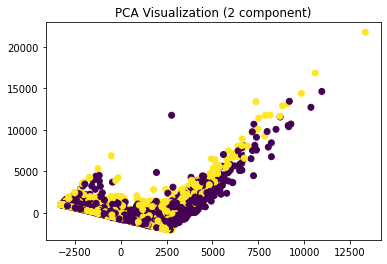

In [78]:
# Data visualization
# tSNE or PCA here

pcaComps = 2
pca = PCA(n_components=pcaComps)
pca_train = pca.fit_transform(X_train, y_train)
pca_test = pca.transform(X_test)

if pcaComps == 2:
  plt.scatter(pca_train[:, 0], pca_train[:, 1], c=y_train)
plt.title(f"PCA Visualization ({pcaComps} component)")
plt.show()

In [ ]:
# Feature selection

# can try filter, wrapper, and embedded methods: https://elearning.mines.edu/courses/40460/pages/instructional-learning-materials-feature-selection?module_item_id=529456
# todo...

In [ ]:
# Feature extraction

# we don't want to use tSNE, consider spectral embedding? maybe linear discriminant analysis?
# todo...

In [ ]:
# Now we have the reduced dataset with high mutual information between each feature, time to run some models

In [ ]:
# knn or svm?

In [ ]:
# neural net
# (try with reduced data and with full dataset)